### <u> <font color='blue'>Projet 9</font>
</u>

# 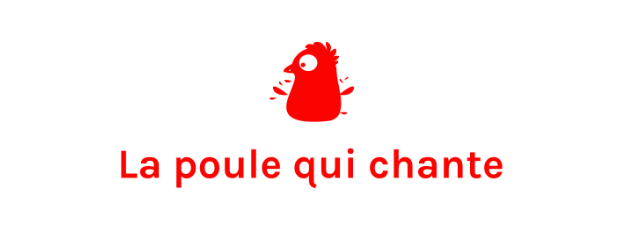

## Importation des bibliothèques <a class="anchor" id="Importation_de_bibliothèques"></a>


In [182]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt

import scipy.stats as st

import seaborn as sns


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import KMeans



## Read_csv \ Nettoyage des fichiers <a class="anchor" id="Nettoyage_des_fichiers"></a>


 <font color='red'>Importation des deux bases disponible + base sur la sécurité alimentaire </font> 


In [183]:
dispo_ali=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\DisponibiliteAlimentaire_2017.csv")

In [184]:
pop_2000_2018=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\Population_2000_2018.csv")

In [185]:
securité_alimentaire=pd.read_csv(r"C:\Users\Rénato CATALFAMO\Desktop\securité_alimentaire.csv")

# Base sur la disponibilité alimentaire / Nettoyage

In [186]:
# Observation de la base de donnée alimentaire 

dispo_ali

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [187]:
# Observation du produit qui fait réference aux poulets

dispo_ali['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [188]:
# filtre pour garder que les produit qui fait référence au poulet

filtre=dispo_ali['Produit']=='Viande de Volailles'
dispo_ali=dispo_ali[filtre]

In [189]:
# Observation des colonnes inuties de la base dispo-ali


print(dispo_ali['Domaine'].unique())
print(dispo_ali['Code Domaine'].unique())
print(dispo_ali['Année'].unique())
print(dispo_ali['Code année'].unique())
print(dispo_ali['Symbole'].unique())



['Nouveaux Bilans Alimentaire']
['FBS']
[2017]
[2017]
['S' 'Fc']


In [190]:
# supression des colonnes inutiles 

del dispo_ali['Code Domaine']
del dispo_ali['Domaine']
del dispo_ali['Année']
del dispo_ali['Code année']
del dispo_ali['Symbole']


In [191]:
# base nettoyé

dispo_ali=dispo_ali.drop(['Code zone','Code Élément','Code Produit','Description du Symbole'] , axis=1)



In [192]:
# Elimination des doublons sur les deux collones 


dispo_ali=dispo_ali.drop_duplicates(subset=['Zone','Élément'], keep='first')
dispo_ali.head(50)

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.00
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.00
653,Afghanistan,Variation de stock,Viande de Volailles,Milliers de tonnes,0.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.00
655,Afghanistan,Pertes,Viande de Volailles,Milliers de tonnes,2.00
656,Afghanistan,Résidus,Viande de Volailles,Milliers de tonnes,0.00
657,Afghanistan,Nourriture,Viande de Volailles,Milliers de tonnes,55.00
658,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,Viande de Volailles,kg,1.53
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,5.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,g/personne/jour,0.54


In [193]:
dispo_ali_filtrer=dispo_ali.query(' Élément == ["Production", "Importations - Quantité","Exportations - Quantité","Disponibilité intérieure","Disponibilité alimentaire (Kcal/personne/jour)","Nourriture"]')
dispo_ali_filtrer.head(20)

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.0
657,Afghanistan,Nourriture,Viande de Volailles,Milliers de tonnes,55.0
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,5.0
1704,Afrique du Sud,Production,Viande de Volailles,Milliers de tonnes,1667.0
1705,Afrique du Sud,Importations - Quantité,Viande de Volailles,Milliers de tonnes,514.0
1707,Afrique du Sud,Exportations - Quantité,Viande de Volailles,Milliers de tonnes,63.0
1708,Afrique du Sud,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,2118.0
1712,Afrique du Sud,Nourriture,Viande de Volailles,Milliers de tonnes,2035.0


In [194]:
# Observation du nombre de pays

dispo_ali_nbr_pays=dispo_ali.drop_duplicates(subset=['Zone'], keep='first')
dispo_ali_nbr_pays

,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.0
1704,Afrique du Sud,Production,Viande de Volailles,Milliers de tonnes,1667.0
2713,Albanie,Production,Viande de Volailles,Milliers de tonnes,13.0
3772,Algérie,Production,Viande de Volailles,Milliers de tonnes,275.0
4873,Allemagne,Production,Viande de Volailles,Milliers de tonnes,1514.0
...,...,...,...,...,...
172328,Venezuela (République bolivarienne du),Production,Viande de Volailles,Milliers de tonnes,600.0
173387,Viet Nam,Production,Viande de Volailles,Milliers de tonnes,918.0
174318,Yémen,Production,Viande de Volailles,Milliers de tonnes,168.0
175361,Zambie,Production,Viande de Volailles,Milliers de tonnes,49.0


In [195]:
# Netooyage des NAN en 0
# base final sans le pivot 

dispo_ali_filtrer=dispo_ali_filtrer.replace(np.nan,0)
dispo_ali_filtrer


,Zone,Élément,Produit,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,Milliers de tonnes,29.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,57.0
657,Afghanistan,Nourriture,Viande de Volailles,Milliers de tonnes,55.0
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,Kcal/personne/jour,5.0
...,...,...,...,...,...
176388,Zimbabwe,Production,Viande de Volailles,Milliers de tonnes,69.0
176389,Zimbabwe,Importations - Quantité,Viande de Volailles,Milliers de tonnes,6.0
176391,Zimbabwe,Disponibilité intérieure,Viande de Volailles,Milliers de tonnes,76.0
176396,Zimbabwe,Nourriture,Viande de Volailles,Milliers de tonnes,67.0


In [196]:
# création d'un pivot pour avoir plus de variables et observation -> Pca



dispo_ali_pivot=dispo_ali_filtrer.pivot_table(index='Zone',columns='Élément', values='Valeur')
dispo_ali_pivot


Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,,,
Afghanistan,5.0,57.0,NaN,29.0,55.0,28.0
Afrique du Sud,143.0,2118.0,63.0,514.0,2035.0,1667.0
Albanie,85.0,47.0,0.0,38.0,47.0,13.0
Algérie,22.0,277.0,0.0,2.0,264.0,275.0
Allemagne,71.0,1739.0,646.0,842.0,1609.0,1514.0
...,...,...,...,...,...,...
Émirats arabes unis,147.0,412.0,94.0,433.0,412.0,48.0
Équateur,83.0,341.0,0.0,0.0,324.0,340.0
États-Unis d'Amérique,219.0,18266.0,3692.0,123.0,18100.0,21914.0


# Base sur la population / Nettoyage

In [197]:
pop_2000_2018

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [198]:
# Observation de la base la population et récupération des colonnes importante

pop_2000_2018=pop_2000_2018[['Zone','Valeur','Année']]
pop_2000_2018

,Zone,Valeur,Année
0,Afghanistan,20779.953,2000
1,Afghanistan,21606.988,2001
2,Afghanistan,22600.770,2002
3,Afghanistan,23680.871,2003
4,Afghanistan,24726.684,2004
...,...,...,...
4406,Zimbabwe,13586.707,2014
4407,Zimbabwe,13814.629,2015
4408,Zimbabwe,14030.331,2016
4409,Zimbabwe,14236.595,2017


In [199]:
# Filtration sur l'année 2017 \ correlation avec l'autre base

filtre_2017=pop_2000_2018['Année']==2017
pop_2017=pop_2000_2018[filtre_2017]
pop_2017

,Zone,Valeur,Année
17,Afghanistan,36296.113,2017
36,Afrique du Sud,57009.756,2017
55,Albanie,2884.169,2017
74,Algérie,41389.189,2017
93,Allemagne,82658.409,2017
...,...,...,...
4333,Venezuela (République bolivarienne du),29402.484,2017
4352,Viet Nam,94600.648,2017
4371,Yémen,27834.819,2017
4390,Zambie,16853.599,2017


In [200]:
# Il n'existe pas de doublon sur la Zone

pop_2017.drop_duplicates(subset=['Zone'], keep='first') 

,Zone,Valeur,Année
17,Afghanistan,36296.113,2017
36,Afrique du Sud,57009.756,2017
55,Albanie,2884.169,2017
74,Algérie,41389.189,2017
93,Allemagne,82658.409,2017
...,...,...,...
4333,Venezuela (République bolivarienne du),29402.484,2017
4352,Viet Nam,94600.648,2017
4371,Yémen,27834.819,2017
4390,Zambie,16853.599,2017


In [201]:
# renommage de la colonne valeur

pop_2017.rename(columns={'Valeur': 'Population'}, inplace=True) 


C:\anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [202]:
# multiplication de la pop *1000 

pop_2017['Population']=pop_2017['Population']*1000

<ipython-input-202-8cb9622262a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_2017['Population']=pop_2017['Population']*1000


In [203]:
del pop_2017['Année']

In [204]:
pop_2017



,Zone,Population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0
...,...,...
4333,Venezuela (République bolivarienne du),29402484.0
4352,Viet Nam,94600648.0
4371,Yémen,27834819.0
4390,Zambie,16853599.0


# Base sur la sécurité alimentaire / Nettoyage

In [205]:
# Observation

securité_alimentaire.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code ?l?ment,?l?ment,Code Produit,Produit,Code ann?e,Ann?e,Unit?,Valeur,Symbole,Description du Symbole,Note
0,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6121,Valeur,210401,Pr?valence de l?ins?curit? alimentaire grave ?...,20162018,2016-2018,%,17.3,F,Estimation FAO,NaN
1,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6121,Valeur,210401,Pr?valence de l?ins?curit? alimentaire grave ?...,20182020,2018-2020,%,19.8,F,Estimation FAO,NaN
2,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6121,Valeur,210091,Pr?valence de l?ins?curit? alimentaire mod?r?e...,20162018,2016-2018,%,54.3,F,Estimation FAO,NaN
3,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6121,Valeur,210091,Pr?valence de l?ins?curit? alimentaire mod?r?e...,20182020,2018-2020,%,63.1,F,Estimation FAO,NaN
4,FS,Donn?es de la s?curit? alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilit? politique et absence de violence/ter...,2017,2017,indice,-2.8,X,Sources internationales s?res,NaN


In [206]:
# recupération des colonnes utiles
# concaténation de deux colonnes


securité_alimentaire=securité_alimentaire[['Zone','Produit','Ann?e','Valeur','Unit?']]


In [207]:
# Supression des deux colonnes inutiles

securité_alimentaire=securité_alimentaire.drop(['Unit?'] , axis=1)
securité_alimentaire

,Zone,Produit,Ann?e,Valeur
0,Afghanistan,Pr?valence de l?ins?curit? alimentaire grave ?...,2016-2018,17.3
1,Afghanistan,Pr?valence de l?ins?curit? alimentaire grave ?...,2018-2020,19.8
2,Afghanistan,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2016-2018,54.3
3,Afghanistan,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2018-2020,63.1
4,Afghanistan,Stabilit? politique et absence de violence/ter...,2017,-2.8
...,...,...,...,...
1203,Zimbabwe,Pr?valence de l?ins?curit? alimentaire grave ?...,2018-2020,32.1
1204,Zimbabwe,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2016-2018,67
1205,Zimbabwe,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2018-2020,69.8
1206,Zimbabwe,Stabilit? politique et absence de violence/ter...,2017,-0.71


In [208]:
# Observation du nombre de pays 


securité_alimentaire_nbre_pays=securité_alimentaire['Zone']

 <font color='red'> L'indicateur de stabilité politique = absence de terrorisme utilisé par la faO est l'un des indices du projet « World Governance Indicator » de Kauff- man, Kraay et mastruzzi mené par la banque mon- diale. c'est un indice oscillant entre 2,85 et -2,85, une valeur proche de -2,85 indiquant une situation de guerre </font> 


In [209]:
# Observation des colonnes 

securité_alimentaire.columns

Index(['Zone', 'Produit', 'Ann?e', 'Valeur'], dtype='object')

In [210]:
securité_alimentaire['Zone'].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Alg?rie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine', 'Arm?nie', 'Australie', 'Autriche', 'Azerba?djan',
       'Bahamas', 'Bahre?n', 'Bangladesh', 'Barbade', 'B?larus',
       'Belgique', 'Belize', 'B?nin', 'Bermudes', 'Bhoutan',
       'Bolivie (?tat plurinational de)', 'Bosnie-Herz?govine',
       'Botswana', 'Br?sil', 'Brun?i Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "C?te d'Ivoire", 'Croatie', 'Cuba',
       'Danemark', 'Djibouti', 'Dominique', '?gypte', 'El Salvador',
       '?mirats arabes unis', '?quateur', '?rythr?e', 'Espagne',
       'Estonie', 'Eswatini', "?tats-Unis d'Am?rique", '?thiopie',
       '

In [211]:
# changement de la base en "string" \ nettoyage

securité_alimentaire.astype("string") 

,Zone,Produit,Ann?e,Valeur
0,Afghanistan,Pr?valence de l?ins?curit? alimentaire grave ?...,2016-2018,17.3
1,Afghanistan,Pr?valence de l?ins?curit? alimentaire grave ?...,2018-2020,19.8
2,Afghanistan,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2016-2018,54.3
3,Afghanistan,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2018-2020,63.1
4,Afghanistan,Stabilit? politique et absence de violence/ter...,2017,-2.8
...,...,...,...,...
1203,Zimbabwe,Pr?valence de l?ins?curit? alimentaire grave ?...,2018-2020,32.1
1204,Zimbabwe,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2016-2018,67
1205,Zimbabwe,Pr?valence de l?ins?curit? alimentaire mod?r?e...,2018-2020,69.8
1206,Zimbabwe,Stabilit? politique et absence de violence/ter...,2017,-0.71


In [212]:
# nettoyage

# Changement de ? par des e

securité_alimentaire['Zone']=securité_alimentaire['Zone'].str.replace('?', 'é')
securité_alimentaire['Produit']=securité_alimentaire['Produit'].str.replace('?', 'é')
securité_alimentaire=securité_alimentaire.rename(columns = {'Ann?e': 'Année'})
securité_alimentaire['Année']=securité_alimentaire['Année'].str.replace('2016-2018', '2017')
securité_alimentaire['Année']=securité_alimentaire['Année'].str.replace('2018-2020', '2019')
securité_alimentaire

<ipython-input-212-ae2dd75ef8db>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  securité_alimentaire['Zone']=securité_alimentaire['Zone'].str.replace('?', 'é')
<ipython-input-212-ae2dd75ef8db>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  securité_alimentaire['Produit']=securité_alimentaire['Produit'].str.replace('?', 'é')


,Zone,Produit,Année,Valeur
0,Afghanistan,Prévalence de léinsécurité alimentaire grave é...,2017,17.3
1,Afghanistan,Prévalence de léinsécurité alimentaire grave é...,2019,19.8
2,Afghanistan,Prévalence de léinsécurité alimentaire modérée...,2017,54.3
3,Afghanistan,Prévalence de léinsécurité alimentaire modérée...,2019,63.1
4,Afghanistan,Stabilité politique et absence de violence/ter...,2017,-2.8
...,...,...,...,...
1203,Zimbabwe,Prévalence de léinsécurité alimentaire grave é...,2019,32.1
1204,Zimbabwe,Prévalence de léinsécurité alimentaire modérée...,2017,67
1205,Zimbabwe,Prévalence de léinsécurité alimentaire modérée...,2019,69.8
1206,Zimbabwe,Stabilité politique et absence de violence/ter...,2017,-0.71


In [213]:
securité_alimentaire['Valeur']=securité_alimentaire['Valeur'].str.replace('<0.5','0.5')


<ipython-input-213-6c1dc8c666f8>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  securité_alimentaire['Valeur']=securité_alimentaire['Valeur'].str.replace('<0.5','0.5')


In [214]:
filtrage_2017=securité_alimentaire['Année']=='2017'
securité_alimentaire=securité_alimentaire[filtrage_2017]
securité_alimentaire=securité_alimentaire.replace(np.nan,0)
securité_alimentaire.rename(columns={'Produit': 'situation'}, inplace=True)
securité_alimentaire

,Zone,situation,Année,Valeur
0,Afghanistan,Prévalence de léinsécurité alimentaire grave é...,2017,17.3
2,Afghanistan,Prévalence de léinsécurité alimentaire modérée...,2017,54.3
4,Afghanistan,Stabilité politique et absence de violence/ter...,2017,-2.8
6,Afrique du Sud,Prévalence de léinsécurité alimentaire grave é...,2017,0
8,Afrique du Sud,Prévalence de léinsécurité alimentaire modérée...,2017,0
...,...,...,...,...
1198,Zambie,Prévalence de léinsécurité alimentaire modérée...,2017,50.1
1200,Zambie,Stabilité politique et absence de violence/ter...,2017,0.15
1202,Zimbabwe,Prévalence de léinsécurité alimentaire grave é...,2017,35.9
1204,Zimbabwe,Prévalence de léinsécurité alimentaire modérée...,2017,67


In [215]:
# On sait que c'est l'année 2017
# transformation en objet \ réafectation


securité_alimentaire=securité_alimentaire.drop(['Année'], axis=1)
securité_alimentaire['Zone']=securité_alimentaire['Zone'].astype("object")

In [216]:
# base final sans pivot 

securité_alimentaire['Valeur']=securité_alimentaire['Valeur'].astype("float")
securité_alimentaire


,Zone,situation,Valeur
0,Afghanistan,Prévalence de léinsécurité alimentaire grave é...,17.30
2,Afghanistan,Prévalence de léinsécurité alimentaire modérée...,54.30
4,Afghanistan,Stabilité politique et absence de violence/ter...,-2.80
6,Afrique du Sud,Prévalence de léinsécurité alimentaire grave é...,0.00
8,Afrique du Sud,Prévalence de léinsécurité alimentaire modérée...,0.00
...,...,...,...
1198,Zambie,Prévalence de léinsécurité alimentaire modérée...,50.10
1200,Zambie,Stabilité politique et absence de violence/ter...,0.15
1202,Zimbabwe,Prévalence de léinsécurité alimentaire grave é...,35.90
1204,Zimbabwe,Prévalence de léinsécurité alimentaire modérée...,67.00


In [217]:
securité_alimentaire_pivot=securité_alimentaire.pivot(index='Zone', columns='situation', values='Valeur')
securité_alimentaire_pivot


situation,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,
Afghanistan,17.3,54.3,-2.80
Afrique du Sud,0.0,0.0,-0.28
Albanie,11.0,38.6,0.38
Algérie,11.4,19.7,-0.92
Allemagne,0.7,3.6,0.59
...,...,...,...
émirats arabes unis,0.0,0.0,0.62
équateur,8.4,26.2,-0.07
érythrée,0.0,0.0,-0.73


# Jointure des bases <a class="anchor" id="jointure_des_fichiers"></a>


In [218]:
# Observation

print(pop_2017)
print(dispo_ali)
print(securité_alimentaire)

                                        Zone  Population
17                               Afghanistan  36296113.0
36                            Afrique du Sud  57009756.0
55                                   Albanie   2884169.0
74                                   Algérie  41389189.0
93                                 Allemagne  82658409.0
...                                      ...         ...
4333  Venezuela (République bolivarienne du)  29402484.0
4352                                Viet Nam  94600648.0
4371                                   Yémen  27834819.0
4390                                  Zambie  16853599.0
4409                                Zimbabwe  14236595.0

[236 rows x 2 columns]
               Zone                                            Élément  \
651     Afghanistan                                         Production   
652     Afghanistan                            Importations - Quantité   
653     Afghanistan                                 Variation de stock

In [219]:
# Jointure des deux bases

base=pd.merge(pop_2017, dispo_ali_pivot, left_on="Zone", right_on="Zone")
base

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,36296113.0,5.0,57.0,NaN,29.0,55.0,28.0
1,Afrique du Sud,57009756.0,143.0,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,2884169.0,85.0,47.0,0.0,38.0,47.0,13.0
3,Algérie,41389189.0,22.0,277.0,0.0,2.0,264.0,275.0
4,Allemagne,82658409.0,71.0,1739.0,646.0,842.0,1609.0,1514.0
...,...,...,...,...,...,...,...,...
167,Venezuela (République bolivarienne du),29402484.0,71.0,626.0,0.0,25.0,596.0,600.0
168,Viet Nam,94600648.0,48.0,1206.0,1.0,291.0,1166.0,918.0
169,Yémen,27834819.0,30.0,246.0,0.0,78.0,237.0,168.0
170,Zambie,16853599.0,11.0,60.0,1.0,12.0,58.0,49.0


In [220]:

# base final et netoyage final
# nettoyage des 0
# Zone\Pays mis en index


base2=pd.merge(base,securité_alimentaire_pivot, left_on="Zone", right_on="Zone")
base2=base2.replace(np.nan,0)
base2=base2.set_index('Zone')
base2

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,
Afghanistan,36296113.0,5.0,57.0,0.0,29.0,55.0,28.0,17.3,54.3,-2.80
Afrique du Sud,57009756.0,143.0,2118.0,63.0,514.0,2035.0,1667.0,0.0,0.0,-0.28
Albanie,2884169.0,85.0,47.0,0.0,38.0,47.0,13.0,11.0,38.6,0.38
Algérie,41389189.0,22.0,277.0,0.0,2.0,264.0,275.0,11.4,19.7,-0.92
Allemagne,82658409.0,71.0,1739.0,646.0,842.0,1609.0,1514.0,0.7,3.6,0.59
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),29402484.0,71.0,626.0,0.0,25.0,596.0,600.0,0.0,0.0,-1.25
Viet Nam,94600648.0,48.0,1206.0,1.0,291.0,1166.0,918.0,0.5,6.2,0.29
Yémen,27834819.0,30.0,246.0,0.0,78.0,237.0,168.0,0.0,0.0,-2.94


In [221]:
# copie de la base de donnée final 

base_f = base2.copy()



In [222]:
base_f

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,
Afghanistan,36296113.0,5.0,57.0,0.0,29.0,55.0,28.0,17.3,54.3,-2.80
Afrique du Sud,57009756.0,143.0,2118.0,63.0,514.0,2035.0,1667.0,0.0,0.0,-0.28
Albanie,2884169.0,85.0,47.0,0.0,38.0,47.0,13.0,11.0,38.6,0.38
Algérie,41389189.0,22.0,277.0,0.0,2.0,264.0,275.0,11.4,19.7,-0.92
Allemagne,82658409.0,71.0,1739.0,646.0,842.0,1609.0,1514.0,0.7,3.6,0.59
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),29402484.0,71.0,626.0,0.0,25.0,596.0,600.0,0.0,0.0,-1.25
Viet Nam,94600648.0,48.0,1206.0,1.0,291.0,1166.0,918.0,0.5,6.2,0.29
Yémen,27834819.0,30.0,246.0,0.0,78.0,237.0,168.0,0.0,0.0,-2.94


# Observation de chaques variables 

In [223]:
# préparation des colonnes \ Observation

n = base_f.columns

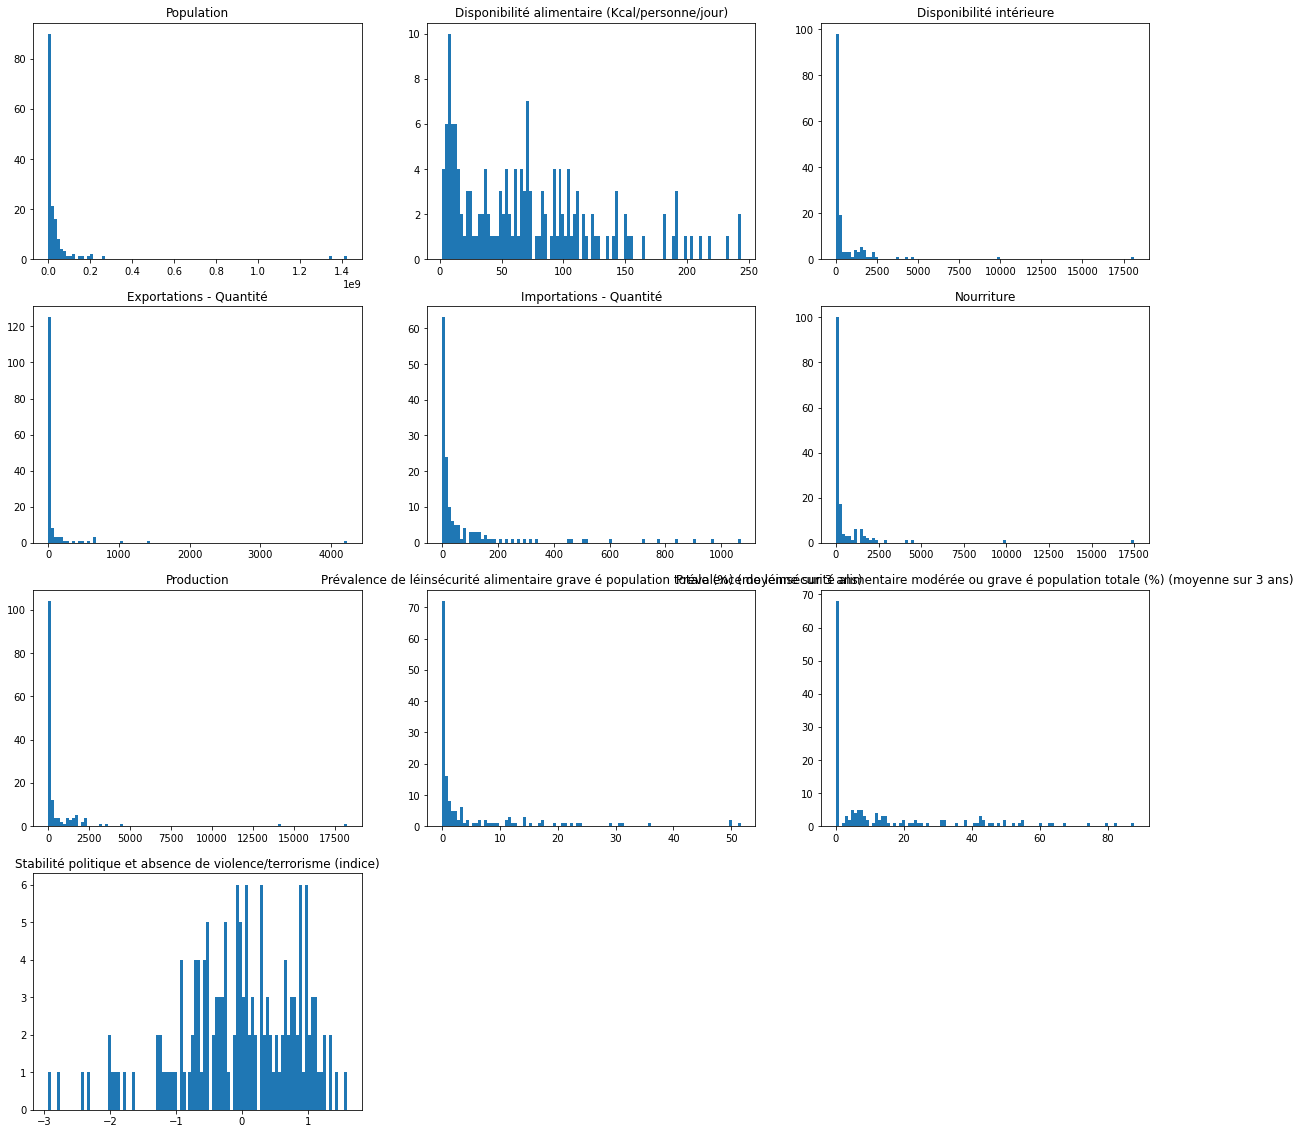

In [224]:
# Observation des outliers de chaques variables 

fig = plt.figure(figsize=(20, 20))
i=1
for col in n : 
    ax = fig.add_subplot(4,3,i)
    ax.hist(base_f[col], bins = 100)
    ax.set_title(col)
    i+=1
plt.show()

# Transformation des données \ Fonction log

In [225]:
base_f.columns

Index(['Population', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production',
       'Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans)',
       'Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans)',
       'Stabilité politique et absence de violence/terrorisme (indice)'],
      dtype='object')

(array([1., 0., 0., 1., 0., 1., 0., 3., 0., 0., 0., 0., 2., 1., 0., 0., 3.,
        0., 1., 2., 1., 0., 2., 2., 2., 0., 1., 1., 1., 0., 2., 3., 1., 0.,
        1., 1., 6., 1., 0., 3., 2., 1., 4., 2., 6., 2., 3., 5., 4., 1., 5.,
        4., 5., 2., 1., 2., 4., 5., 2., 2., 4., 4., 5., 2., 4., 4., 2., 4.,
        2., 2., 1., 2., 1., 1., 1., 0., 2., 1., 1., 0., 1., 2., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([10.85986401, 10.96201179, 11.06415957, 11.16630735, 11.26845513,
        11.37060291, 11.47275069, 11.57489847, 11.67704625, 11.77919403,
        11.88134181, 11.98348959, 12.08563737, 12.18778515, 12.28993293,
        12.39208071, 12.49422849, 12.59637627, 12.69852405, 12.80067183,
        12.90281961, 13.00496739, 13.10711517, 13.20926295, 13.31141073,
        13.41355851, 13.51570629, 13.61785407, 13.72000185, 13.82214963,
        13.92429741, 14.02644519, 14.12859297, 14.23074075, 14.33288853,
        14.43503631, 14.53718409, 14.63

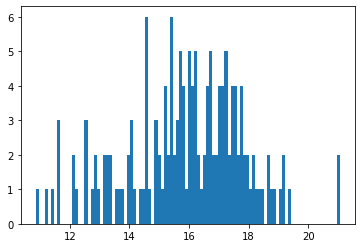

In [226]:
# observation de la modification 

plt.hist(np.log(base_f['Population']),bins=100)

In [227]:
# Modification de la variable

# base_f['Population']=np.log(base_f['Population']+1)

In [228]:
# Arrondi de la base

base_f=round(base_f,2)
base_f

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,
Afghanistan,36296113.0,5.0,57.0,0.0,29.0,55.0,28.0,17.3,54.3,-2.80
Afrique du Sud,57009756.0,143.0,2118.0,63.0,514.0,2035.0,1667.0,0.0,0.0,-0.28
Albanie,2884169.0,85.0,47.0,0.0,38.0,47.0,13.0,11.0,38.6,0.38
Algérie,41389189.0,22.0,277.0,0.0,2.0,264.0,275.0,11.4,19.7,-0.92
Allemagne,82658409.0,71.0,1739.0,646.0,842.0,1609.0,1514.0,0.7,3.6,0.59
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),29402484.0,71.0,626.0,0.0,25.0,596.0,600.0,0.0,0.0,-1.25
Viet Nam,94600648.0,48.0,1206.0,1.0,291.0,1166.0,918.0,0.5,6.2,0.29
Yémen,27834819.0,30.0,246.0,0.0,78.0,237.0,168.0,0.0,0.0,-2.94


### Optimisation du code \ Fonction log

In [229]:
n

Index(['Population', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production',
       'Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans)',
       'Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans)',
       'Stabilité politique et absence de violence/terrorisme (indice)'],
      dtype='object')

In [230]:
# modification de toute les variables (sauf stabilité politique)

for i in range(9):
    g=base_f[n[i]]=np.log(base_f[n[i]]+1)
    print(g)

Zone
Afghanistan                               17.407221
Afrique du Sud                            17.858733
Albanie                                   14.874748
Algérie                                   17.538530
Allemagne                                 18.230227
                                            ...    
Venezuela (République bolivarienne du)    17.196590
Viet Nam                                  18.365175
Yémen                                     17.141798
Zambie                                    16.640075
Zimbabwe                                  16.471326
Name: Population, Length: 154, dtype: float64
Zone
Afghanistan                               1.791759
Afrique du Sud                            4.969813
Albanie                                   4.454347
Algérie                                   3.135494
Allemagne                                 4.276666
                                            ...   
Venezuela (République bolivarienne du)    4.276666
Viet Nam       

In [231]:
# observation de la nouvelle base 

base_f

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,
Afghanistan,17.407221,1.791759,4.060443,0.000000,3.401197,4.025352,3.367296,2.906901,4.012773,-2.80
Afrique du Sud,17.858733,4.969813,7.658700,4.158883,6.244167,7.618742,7.419381,0.000000,0.000000,-0.28
Albanie,14.874748,4.454347,3.871201,0.000000,3.663562,3.871201,2.639057,2.484907,3.678829,0.38
Algérie,17.538530,3.135494,5.627621,0.000000,1.098612,5.579730,5.620401,2.517696,3.030134,-0.92
Allemagne,18.230227,4.276666,7.461640,6.472346,6.736967,7.383989,7.323171,0.530628,1.526056,0.59
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),17.196590,4.276666,6.440947,0.000000,3.258097,6.391917,6.398595,0.000000,0.000000,-1.25
Viet Nam,18.365175,3.891820,7.095893,0.693147,5.676754,7.062192,6.823286,0.405465,1.974081,0.29
Yémen,17.141798,3.433987,5.509388,0.000000,4.369448,5.472271,5.129899,0.000000,0.000000,-2.94


## Matrice des correlations entre les variables

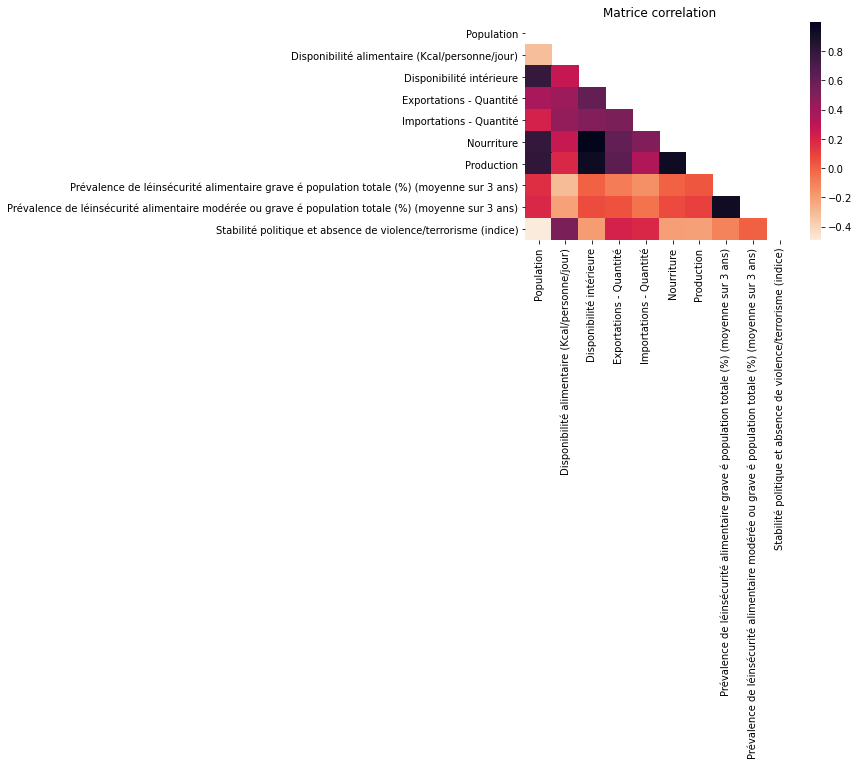

In [232]:

mask = np.triu(np.ones_like(base_f.corr(), dtype=bool)) # diagonale mis à zero avec triu \ ones_like tableau avec des uns

#affichage de la corrélation entre variables

cmap = sns.cm.rocket_r # rocket_r est une palette de couleur 

sns.heatmap(base_f.corr(), mask = mask, cmap =cmap)
plt.title("Matrice correlation")
plt.show()

# PCA de la base issue de la jointure \ Récupération de 80% de la variance

In [233]:
# Importation des librairies spécifique 


from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [234]:
# reprise des valeurs de la base final \ méthode non obligatoire car les données ont été préparé 

X1 = base_f.values


In [235]:
# préparation des données 

scaler = StandardScaler()

scaler = scaler.fit(X1)

X=scaler.transform(X1)

In [236]:
# model de pca par defaut \ transformation des données

model = PCA()
X_reduced = model.fit_transform(X)

In [237]:
# Observation

X_reduced

array([[-0.22337507,  3.84602346,  0.50900956, ..., -0.09182866,
         0.04043428,  0.01665666],
       [ 3.47417646, -1.52716993,  0.71672288, ..., -0.01254513,
         0.13747339, -0.00497185],
       [-0.87113994,  0.5448741 , -1.87094012, ...,  0.1420909 ,
         0.16672153, -0.02800598],
       ...,
       [ 0.96469138,  0.79354453,  2.85744983, ..., -0.24161498,
         0.13795926, -0.0103215 ],
       [-0.42553078,  2.28503385, -1.37029187, ..., -0.11692277,
         0.02152704, -0.01333213],
       [-0.38171653,  2.89717396, -1.18473283, ..., -0.15884449,
         0.08864797,  0.01120149]])

In [238]:
# Observation de la variance cumulé

model.explained_variance_ratio_.cumsum()

array([0.44343   , 0.68838018, 0.85220201, 0.90859928, 0.95430772,
       0.98568463, 0.9914161 , 0.99651685, 0.99974479, 1.        ])

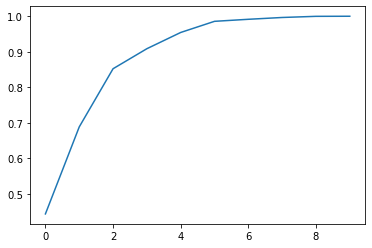

In [239]:
# Observation du nombre de la variance expliqué

plt.plot(np.cumsum(model.explained_variance_ratio_))

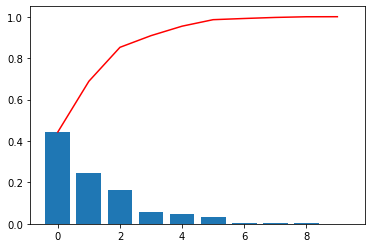

In [240]:
# Observation du diagramme de pareto concernant la variance expliqué \ autre façon
y = list(model.explained_variance_ratio_)

x = range(len(y))

ycum = np.cumsum(y)

plt.bar(x,y)

plt.plot(x,ycum,"-r")

plt.show()

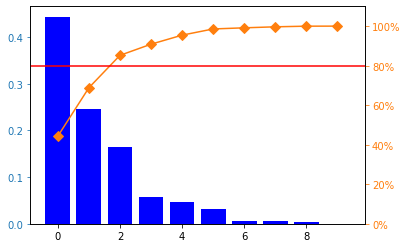

In [241]:
# Autre façonde faire plus élaboré


def pareto(data) :

    from matplotlib.ticker import PercentFormatter

    import numpy as np

    y = list(data)

    x = range(len(data))

    ycum = np.cumsum(y)/sum(y)*100

    fig, ax = plt.subplots()

    ax.bar(x,y,color="blue")

    ax2 = ax.twinx()

    ax2.plot(x,ycum, color="C1", marker="D", ms=7)

    ax2.axhline(y=80,color="r")

    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")

    ax2.tick_params(axis="y", colors="C1")

    plt.ylim(0,110)

    plt.show()


pareto(model.explained_variance_ratio_)


 <font color='red'> On peut voir qu'il y a plus 80% de l'information pour 3 variables </font>

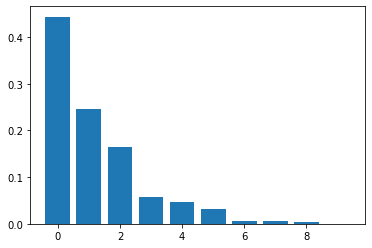

In [242]:
# Pourcentage de variance exploqué pour chaque chaque composante vu precèdement \ graphique à part

plt.bar(range(model.n_components_), model.explained_variance_ratio_)
plt.show()




 <font color='red'> On sait à présent à se stade le nombre de composante qu'il faut pour garder le maximum d'information du Dataset. 3 variables pour +80% </font>

















In [243]:
# modèle avec les 3 variables selectionné ou 80% 


model = PCA(n_components=0.80)
X_reduced= model.fit_transform(X)



In [244]:
# Observation de la dimension réduite

X_reduced.shape


(154, 3)

In [245]:
# recuperation des colonnes 

for idx,column in enumerate(base_f.columns):
    print(idx,column)

0 Population
1 Disponibilité alimentaire (Kcal/personne/jour)
2 Disponibilité intérieure
3 Exportations - Quantité
4 Importations - Quantité
5 Nourriture
6 Production
7 Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans)
8 Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans)
9 Stabilité politique et absence de violence/terrorisme (indice)


In [246]:
base_f

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,
Afghanistan,17.407221,1.791759,4.060443,0.000000,3.401197,4.025352,3.367296,2.906901,4.012773,-2.80
Afrique du Sud,17.858733,4.969813,7.658700,4.158883,6.244167,7.618742,7.419381,0.000000,0.000000,-0.28
Albanie,14.874748,4.454347,3.871201,0.000000,3.663562,3.871201,2.639057,2.484907,3.678829,0.38
Algérie,17.538530,3.135494,5.627621,0.000000,1.098612,5.579730,5.620401,2.517696,3.030134,-0.92
Allemagne,18.230227,4.276666,7.461640,6.472346,6.736967,7.383989,7.323171,0.530628,1.526056,0.59
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),17.196590,4.276666,6.440947,0.000000,3.258097,6.391917,6.398595,0.000000,0.000000,-1.25
Viet Nam,18.365175,3.891820,7.095893,0.693147,5.676754,7.062192,6.823286,0.405465,1.974081,0.29
Yémen,17.141798,3.433987,5.509388,0.000000,4.369448,5.472271,5.129899,0.000000,0.000000,-2.94


In [247]:
base_final = base_f[['Population','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité intérieure']]

In [248]:
# base issue de la pca qui garde plus de 80% de l'informations

base_final



,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure
Zone,,,
Afghanistan,17.407221,1.791759,4.060443
Afrique du Sud,17.858733,4.969813,7.658700
Albanie,14.874748,4.454347,3.871201
Algérie,17.538530,3.135494,5.627621
Allemagne,18.230227,4.276666,7.461640
...,...,...,...
Venezuela (République bolivarienne du),17.196590,4.276666,6.440947
Viet Nam,18.365175,3.891820,7.095893
Yémen,17.141798,3.433987,5.509388


In [249]:
# Définition de fonction pour utilisé le cercle des corrélations \ Récupérer sur O.C

from matplotlib.collections import LineCollection


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(12,12))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(12,12))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)







# Cercle des correlations des variables \ Projection des pays sur les axes 

In [250]:
from sklearn import decomposition
from sklearn import preprocessing 


In [251]:
# rappel

features = base_f.columns
X1 = base_f.values



In [252]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X1)
X_scaled = std_scale.transform(X1)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=0.80)
pca.fit(X_scaled)


PCA(n_components=0.8)

In [253]:
n_comp = 3

In [254]:
#association des numéro aux libellés des variables

features_n = [value for value in range(1,(len(features)+1))]

In [255]:
#légende du cercle des corrélations

for element in zip(features_n, features) :
    print (element)

(1, 'Population')
(2, 'Disponibilité alimentaire (Kcal/personne/jour)')
(3, 'Disponibilité intérieure')
(4, 'Exportations - Quantité')
(5, 'Importations - Quantité')
(6, 'Nourriture')
(7, 'Production')
(8, 'Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans)')
(9, 'Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans)')
(10, 'Stabilité politique et absence de violence/terrorisme (indice)')


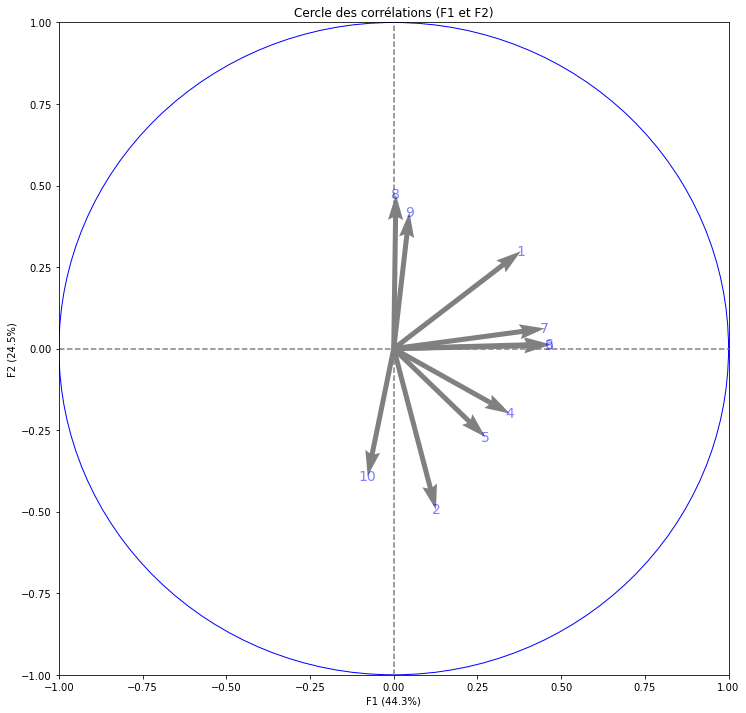

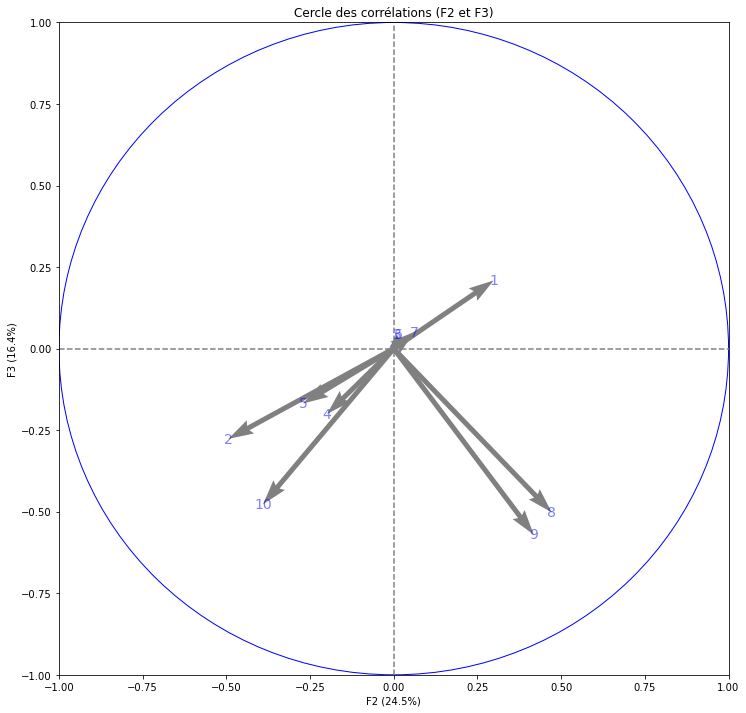

In [256]:

pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(1,2)], labels=features_n)

In [257]:
# Projection des pays sur le plan factoriel

v=base_f.index


In [258]:
#association des numéro aux libellés des pays

pays_n = [value for value in range(1,(len(v)+1))]
pays_n

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154]

In [259]:
#légende du cercle des corrélations

for element in zip(pays_n, v) :
    print (element)

(1, 'Afghanistan')
(2, 'Afrique du Sud')
(3, 'Albanie')
(4, 'Algérie')
(5, 'Allemagne')
(6, 'Angola')
(7, 'Antigua-et-Barbuda')
(8, 'Arabie saoudite')
(9, 'Argentine')
(10, 'Arménie')
(11, 'Australie')
(12, 'Autriche')
(13, 'Bahamas')
(14, 'Bangladesh')
(15, 'Barbade')
(16, 'Bélarus')
(17, 'Belgique')
(18, 'Belize')
(19, 'Bénin')
(20, 'Bosnie-Herzégovine')
(21, 'Botswana')
(22, 'Brésil')
(23, 'Bulgarie')
(24, 'Burkina Faso')
(25, 'Cabo Verde')
(26, 'Cambodge')
(27, 'Cameroun')
(28, 'Canada')
(29, 'Chili')
(30, 'Chine - RAS de Hong-Kong')
(31, 'Chine - RAS de Macao')
(32, 'Chine, continentale')
(33, 'Chine, Taiwan Province de')
(34, 'Chypre')
(35, 'Colombie')
(36, 'Congo')
(37, 'Costa Rica')
(38, 'Croatie')
(39, 'Cuba')
(40, 'Danemark')
(41, 'Djibouti')
(42, 'Dominique')
(43, 'El Salvador')
(44, 'Espagne')
(45, 'Estonie')
(46, 'Eswatini')
(47, 'Fédération de Russie')
(48, 'Fidji')
(49, 'Finlande')
(50, 'France')
(51, 'Gabon')
(52, 'Gambie')
(53, 'Géorgie')
(54, 'Ghana')
(55, 'Grenade')


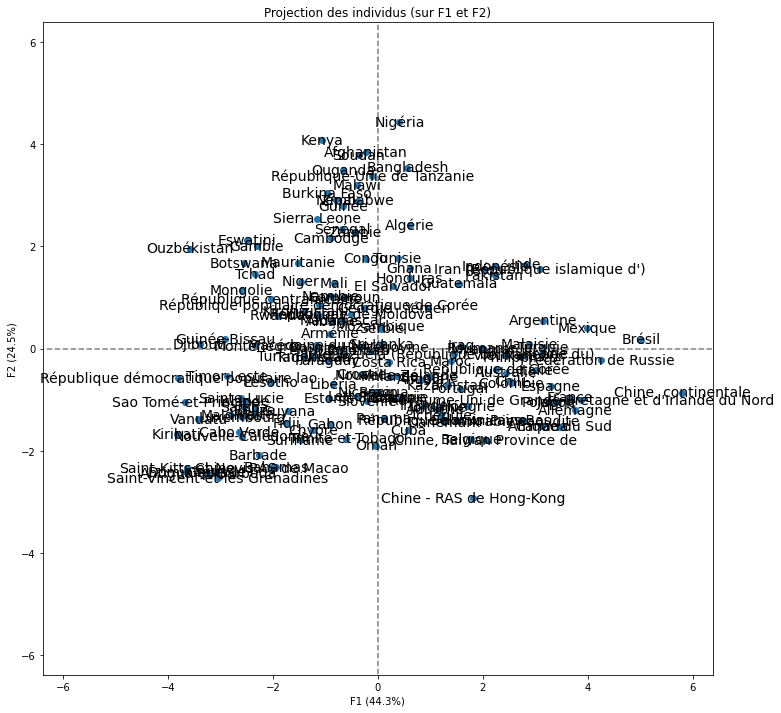

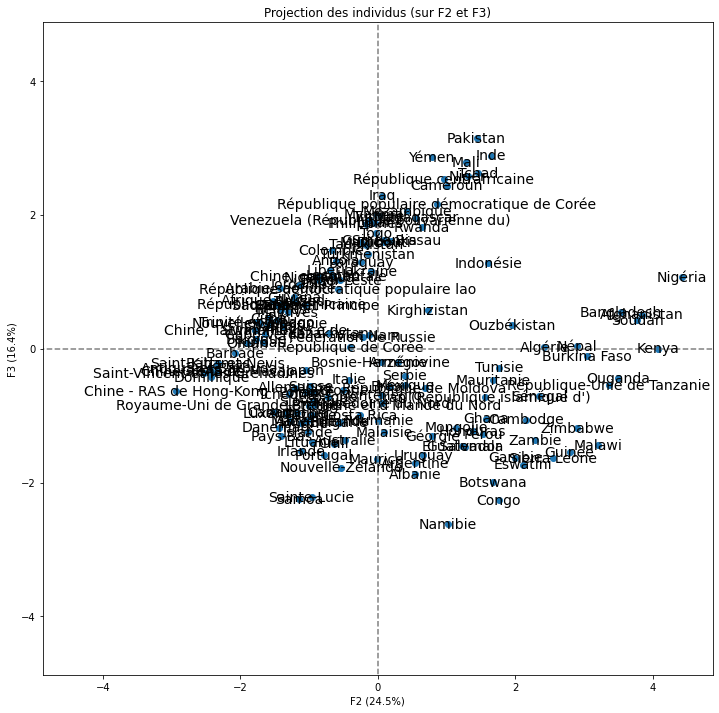

In [260]:
# Projection des pays


X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2)], labels = np.array(v),alpha = 1)
plt.show()

# CAH 


# coefficient de silhouette \ cah

In [261]:
from sklearn import metrics

In [262]:
# Définition établie pour le dendrogram \ CF O.P

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,35))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(Z,labels = names, orientation='left')
    plt.savefig("High resoltion", dpi=300)
    plt.show()

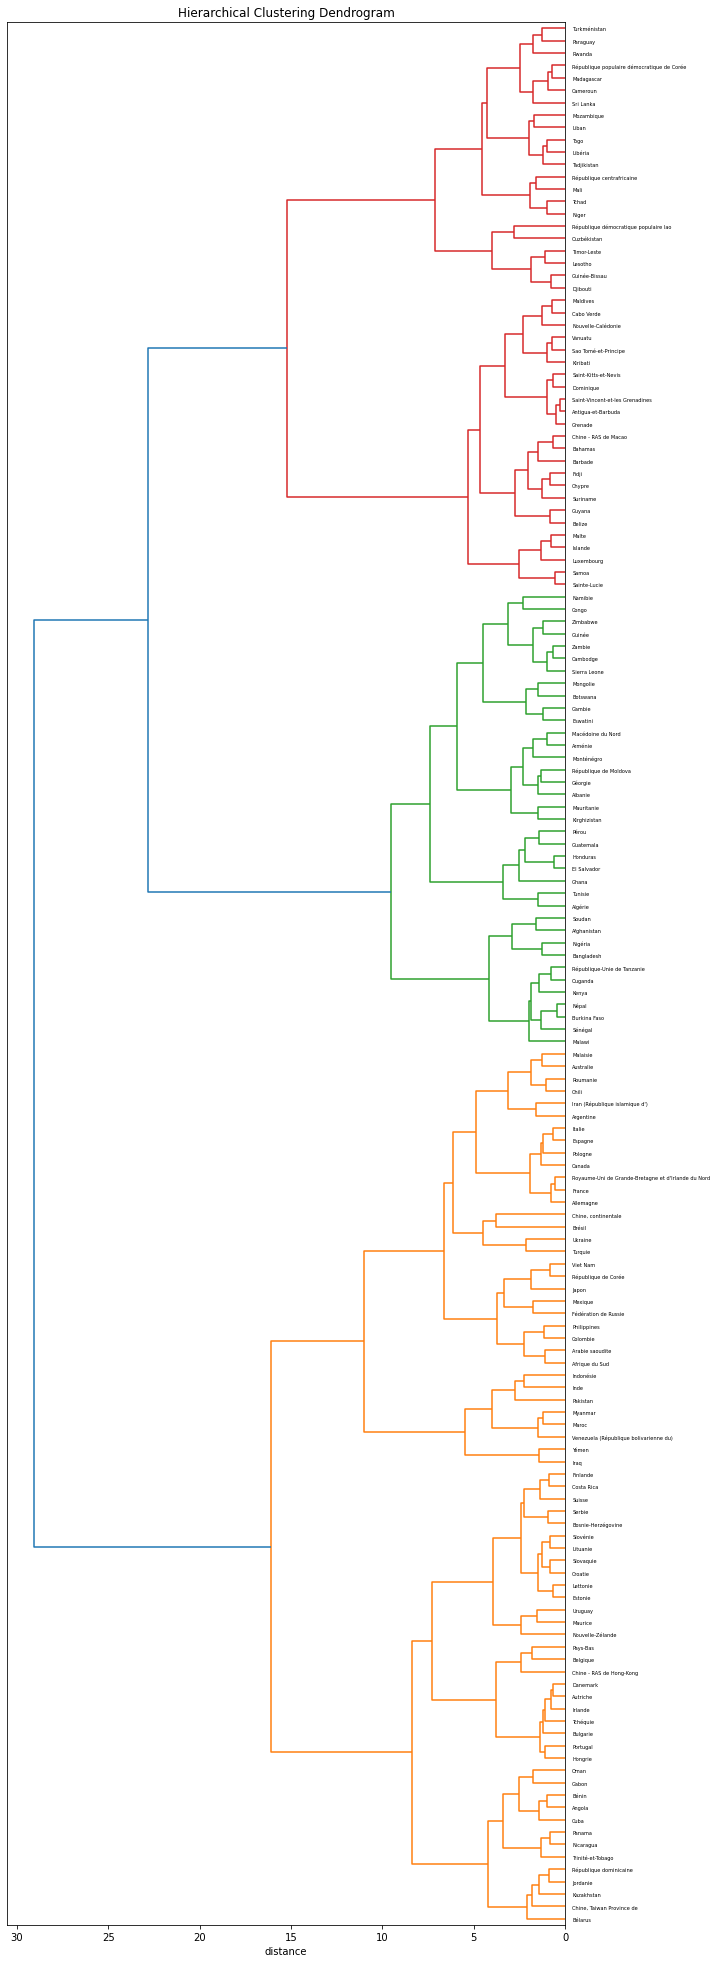

In [263]:
# préparation des données et dendrogramme

# valeur et index 
X3 =base_f.values
names_3 = base_f.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X3)
X_scaled = std_scale.transform(X3)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme

plot_dendrogram(Z,names_3)




In [264]:
# calcul du coefficient de sihouette cah

slc_CAH = {} 

for i in range (2,12) : # 2 à 12 clusters
    clusters_CAH = fcluster(Z, i, criterion='maxclust') 
    slc_CAH[i] = metrics.silhouette_score(X_scaled, clusters_CAH) # code pour la silhouette 

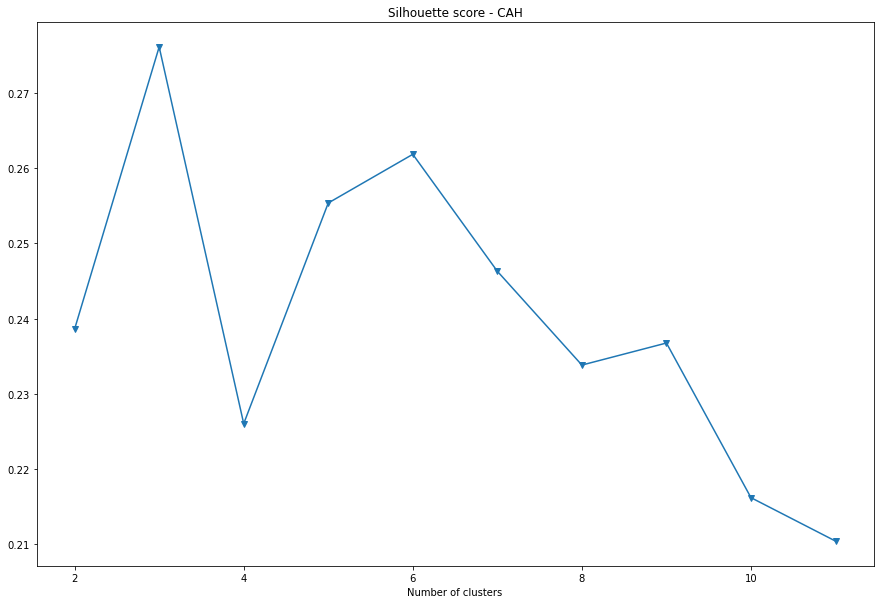

In [265]:
fig = plt.figure(figsize=(15,10))
plt.plot(slc_CAH.keys(), list(slc_CAH.values()), marker='v' ) # marker= symbole
plt.title("Silhouette score - CAH")
plt.xlabel("Number of clusters")
plt.show()

In [266]:
# tableau creer \ groupe en fonction du dendrogramme


# création de la distance 
groupe_cah = fcluster(Z,t=19,criterion='distance')

# triage en foncfion du groupe
idg = np.argsort(groupe_cah)

# création du tableau
pays_groupe=pd.DataFrame(names_3[idg], groupe_cah[idg])

# reset index
pays_groupe=pays_groupe.reset_index()

# renommage
pays_groupe.rename(columns={'index': 'Groupe'}, inplace=True) 

pays_groupe

,Groupe,Zone
0,1,Maroc
1,1,Portugal
2,1,République de Corée
3,1,Gabon
4,1,France
...,...,...
149,3,Rwanda
150,3,Sainte-Lucie
151,3,Saint-Kitts-et-Nevis
152,3,Guinée-Bissau


In [267]:
# Observation des groupes 

pays_groupe['Groupe'].value_counts()

1    71
3    46
2    37
Name: Groupe, dtype: int64

In [268]:
# dertermination du nombre de cluster ( cf silhouette )

clusters_CAH = fcluster(Z, 3, criterion='maxclust') # z -> préparation des données en amont
clusters_CAH


array([2, 1, 2, 2, 1, 1, 3, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 3, 1, 1, 2, 1,
       1, 2, 3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1, 3, 3, 2, 1,
       1, 2, 1, 3, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 2, 3, 3, 3, 1,
       1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 3, 2, 3, 1, 1, 2, 3, 1, 1, 3, 1, 2,
       1, 1, 1, 3, 1, 2, 3, 1, 3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1,
       1, 2, 3, 1, 3, 3, 3, 1, 3, 3, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 2, 2],
      dtype=int32)

In [269]:
base_f_centre_reduit=(base_f-base_f.mean())/base_f.std()
base_f_centre_reduit

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,
Afghanistan,0.783218,-1.903528,-0.296608,-0.730361,0.255067,-0.280404,-0.324195,1.679558,1.501960,-3.047868
Afrique du Sud,1.012494,1.033861,1.557812,1.232713,1.753724,1.564694,1.375589,-0.832823,-1.017844,-0.261492
Albanie,-0.502761,0.557430,-0.394137,-0.730361,0.393371,-0.359556,-0.629680,1.314836,1.292261,0.468273
Algérie,0.849896,-0.661550,0.511063,-0.730361,-0.958729,0.517723,0.620946,1.343176,0.884916,-0.969143
Allemagne,1.201137,0.393204,1.456254,2.324713,2.013501,1.444156,1.335231,-0.374210,-0.059563,0.700471
...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),0.676260,0.393204,0.930223,-0.730361,0.179632,0.934756,0.947386,-0.832823,-1.017844,-1.334025
Viet Nam,1.269663,0.037502,1.267760,-0.403182,1.454615,1.278922,1.125537,-0.482387,0.221772,0.368760
Yémen,0.648437,-0.385661,0.450129,-0.730361,0.765475,0.462545,0.415188,-0.832823,-1.017844,-3.202666


In [270]:
# les numéro de cluster sont ajoutés au df \ Observation


base_f_centre_reduit["cluster CAH"] = clusters_CAH
base_f_centre_reduit

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice),cluster CAH
Zone,,,,,,,,,,,
Afghanistan,0.783218,-1.903528,-0.296608,-0.730361,0.255067,-0.280404,-0.324195,1.679558,1.501960,-3.047868,2
Afrique du Sud,1.012494,1.033861,1.557812,1.232713,1.753724,1.564694,1.375589,-0.832823,-1.017844,-0.261492,1
Albanie,-0.502761,0.557430,-0.394137,-0.730361,0.393371,-0.359556,-0.629680,1.314836,1.292261,0.468273,2
Algérie,0.849896,-0.661550,0.511063,-0.730361,-0.958729,0.517723,0.620946,1.343176,0.884916,-0.969143,2
Allemagne,1.201137,0.393204,1.456254,2.324713,2.013501,1.444156,1.335231,-0.374210,-0.059563,0.700471,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),0.676260,0.393204,0.930223,-0.730361,0.179632,0.934756,0.947386,-0.832823,-1.017844,-1.334025,1
Viet Nam,1.269663,0.037502,1.267760,-0.403182,1.454615,1.278922,1.125537,-0.482387,0.221772,0.368760,1
Yémen,0.648437,-0.385661,0.450129,-0.730361,0.765475,0.462545,0.415188,-0.832823,-1.017844,-3.202666,1


In [271]:
# agrégation et moyenne de la CAH

base_f_centre_reduit.groupby("cluster CAH").mean()

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
cluster CAH,,,,,,,,,,
1,0.469105,0.491038,0.755616,0.724746,0.612498,0.766073,0.731765,-0.294316,-0.146423,0.159299
2,0.161953,-0.811376,-0.254623,-0.578335,-0.376110,-0.256608,-0.247487,1.445983,1.301430,-0.482334
3,-0.854320,-0.105278,-0.961471,-0.653447,-0.642854,-0.976015,-0.930397,-0.708802,-0.820802,0.142090


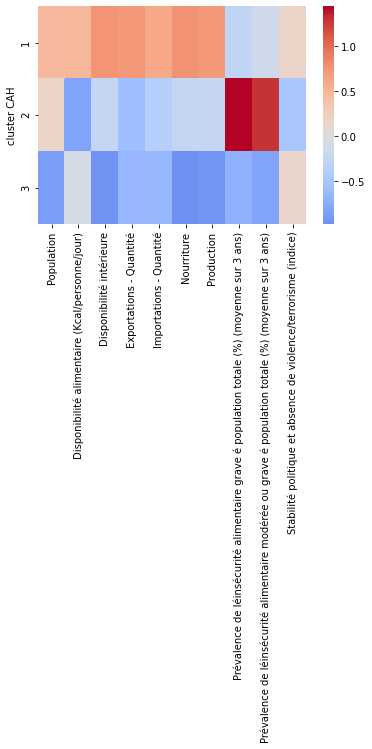

In [308]:
# heatmap en fonction des 3 clusters

sns.heatmap(base_f_centre_reduit.groupby("cluster CAH").mean(), cmap="coolwarm", center=0)


In [273]:
# projection de la cah dans les plans


X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2)],illustrative_var =base_f["cluster CAH"] ,alpha = 1)
plt.show()

KeyError: 'cluster CAH'

# k-means



















In [ ]:

#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de jusqu'à 10

res = []
for k in range(2,11):
    km = cluster.KMeans(n_clusters=k, random_state=0)
    km.fit(X1)
    res.append(metrics.silhouette_score(X1,km.labels_))

print(res)


In [ ]:
fig = plt.figure(figsize=(15,10))
plt.title("méthode de la silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [ ]:
from sklearn import cluster
from sklearn.cluster import KMeans

In [ ]:
# méthode des centre mobile

km = cluster.KMeans(n_clusters=3, random_state=0)
km.fit(X1)


In [ ]:
#index triés des groupes

idk=np.argsort(km.labels_)
idk

In [ ]:
# tableau issue du clustering \ affichage des observations et leurs groupes

T=pd.DataFrame(names_3[idk],km.labels_[idk])
T=T.reset_index()
T.rename(columns={'index': 'groupe_kmeans'}, inplace=True) 
T

In [ ]:
# Observation du nombre de groupes

T['groupe_kmeans'].value_counts()

In [ ]:
# Représentation \ plan factoriel

acp2 = PCA(n_components=3).fit_transform(X1)

# avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen'],[0,1,2]):
    
    plt.scatter(acp2[km.labels_==k,0],acp2[km.labels_==k,1],c=couleur)
plt.show()



In [ ]:
# Projection du k-means \ autre représentation 

# Récupération des plans factoriels de départ \ ilustrative_var = tableau du k_means

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2)],illustrative_var =km.labels_ ,alpha = 1)
plt.show()

In [ ]:
# centroide \ K-means

centroids_after_kmeans = km.cluster_centers_
centroids_after_kmeans

In [ ]:
clusters_km = km.labels_
clusters_km

In [ ]:
L=T['groupe_kmeans'].tolist()

In [ ]:
# création de la colonne cluster kmeans 

base_f['cluster kmeans'] = L

In [ ]:
# Observation des 3 groupes 

base_f['cluster kmeans'].unique()

In [ ]:
# centrage et reduction de la base


base_f_centre_reduit=(base_f-base_f.mean())/base_f.std()
base_f_centre_reduit

In [ ]:
# agrégation et moyenne \ observation

ba = base_f_centre_reduit.groupby("cluster kmeans").mean()
ba

In [ ]:
# heatmap des clusters issues du k-means

base_f_centre_reduit['cluster kmeans']=km.labels_

sns.heatmap(base_f_centre_reduit.groupby("cluster kmeans").mean(), cmap="coolwarm", center=0)


# Comparaison CAH  et K_mean











































































In [ ]:
base_f

In [ ]:
# correspondance entre les deux variables

pd.crosstab(base_f["cluster CAH"],base_f["cluster kmeans"])

In [ ]:
sns.heatmap(pd.crosstab(base_f["cluster CAH"],base_f["cluster kmeans"]),cmap="coolwarm", center=True)

On peut voir qu'entre les clusters il y a de nombreuse similitudes entre la CAH et le K-means

# Choix du cluster de la CAH et du K-means 

In [296]:
base_f_centre_reduit

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice),cluster CAH
Zone,,,,,,,,,,,
Afghanistan,0.783218,-1.903528,-0.296608,-0.730361,0.255067,-0.280404,-0.324195,1.679558,1.501960,-3.047868,2
Afrique du Sud,1.012494,1.033861,1.557812,1.232713,1.753724,1.564694,1.375589,-0.832823,-1.017844,-0.261492,1
Albanie,-0.502761,0.557430,-0.394137,-0.730361,0.393371,-0.359556,-0.629680,1.314836,1.292261,0.468273,2
Algérie,0.849896,-0.661550,0.511063,-0.730361,-0.958729,0.517723,0.620946,1.343176,0.884916,-0.969143,2
Allemagne,1.201137,0.393204,1.456254,2.324713,2.013501,1.444156,1.335231,-0.374210,-0.059563,0.700471,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (République bolivarienne du),0.676260,0.393204,0.930223,-0.730361,0.179632,0.934756,0.947386,-0.832823,-1.017844,-1.334025,1
Viet Nam,1.269663,0.037502,1.267760,-0.403182,1.454615,1.278922,1.125537,-0.482387,0.221772,0.368760,1
Yémen,0.648437,-0.385661,0.450129,-0.730361,0.765475,0.462545,0.415188,-0.832823,-1.017844,-3.202666,1


In [281]:
# choix du cluster

# Observation du cluster numéros 3 ( filtre étbalie sur les données du CAH\k-means heatmap)

cluster_choisie=base_f_centre_reduit['cluster CAH']==1
cluster_choisie=base_f[cluster_choisie]
cluster_choisie

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,
Afrique du Sud,17.858733,4.969813,7.658700,4.158883,6.244167,7.618742,7.419381,0.000000,0.000000,-0.28
Allemagne,18.230227,4.276666,7.461640,6.472346,6.736967,7.383989,7.323171,0.530628,1.526056,0.59
Angola,17.210581,3.583519,5.768321,0.000000,5.627621,5.755742,3.761200,0.000000,0.000000,-0.33
Arabie saoudite,17.315079,5.023881,7.269617,2.397895,6.583409,7.269617,6.424869,0.000000,0.000000,-0.58
Argentine,17.598271,5.209486,7.582229,5.337538,2.197225,7.526718,7.678789,2.501436,3.505557,0.17
...,...,...,...,...,...,...,...,...,...,...
Ukraine,17.610724,4.369448,6.917706,5.613128,4.804021,6.914731,7.100027,1.098612,0.000000,-1.87
Uruguay,15.050005,3.526361,3.526361,1.386294,1.386294,3.465736,3.526361,2.128232,3.261935,1.05
Venezuela (République bolivarienne du),17.196590,4.276666,6.440947,0.000000,3.258097,6.391917,6.398595,0.000000,0.000000,-1.25


In [282]:
# renommage d'une colonne 

cluster_choisie.rename(columns={'Stabilité politique et absence de violence/terrorisme (indice)': 'Stabilité_politique'}, inplace=True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [305]:
# filtration par rapport au importation et à la stabilité politique du cluster


cluster_choisie=cluster_choisie.sort_values(by=['Importations - Quantité', 'Stabilité_politique'], ascending=[False, False])
cluster_choisie

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité_politique
Zone,,,,,,,,,,
Japon,18.663648,4.219508,7.789869,2.397895,6.975414,7.766417,7.703459,0.405465,1.435085,1.11
Mexique,18.642041,4.820282,8.347590,2.302585,6.880384,8.308692,8.086410,1.458615,3.178054,-0.72
Chine - RAS de Hong-Kong,15.804251,5.351858,5.638355,6.498282,6.811244,5.971262,3.218876,0.000000,0.000000,0.83
Allemagne,18.230227,4.276666,7.461640,6.472346,6.736967,7.383989,7.323171,0.530628,1.526056,0.59
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,18.016127,4.795791,7.711997,5.886104,6.659294,7.664816,7.503841,0.993252,1.887070,0.33
...,...,...,...,...,...,...,...,...,...,...
Maurice,14.050187,4.859812,3.912023,0.000000,1.098612,3.891820,3.891820,1.987874,2.970414,0.97
Pakistan,19.152598,3.044522,7.156956,1.609438,1.098612,7.105786,7.156177,0.000000,0.000000,-2.41
Nouvelle-Zélande,15.363506,4.948760,5.129899,3.178054,0.693147,5.105945,5.411646,1.648659,2.660260,1.59


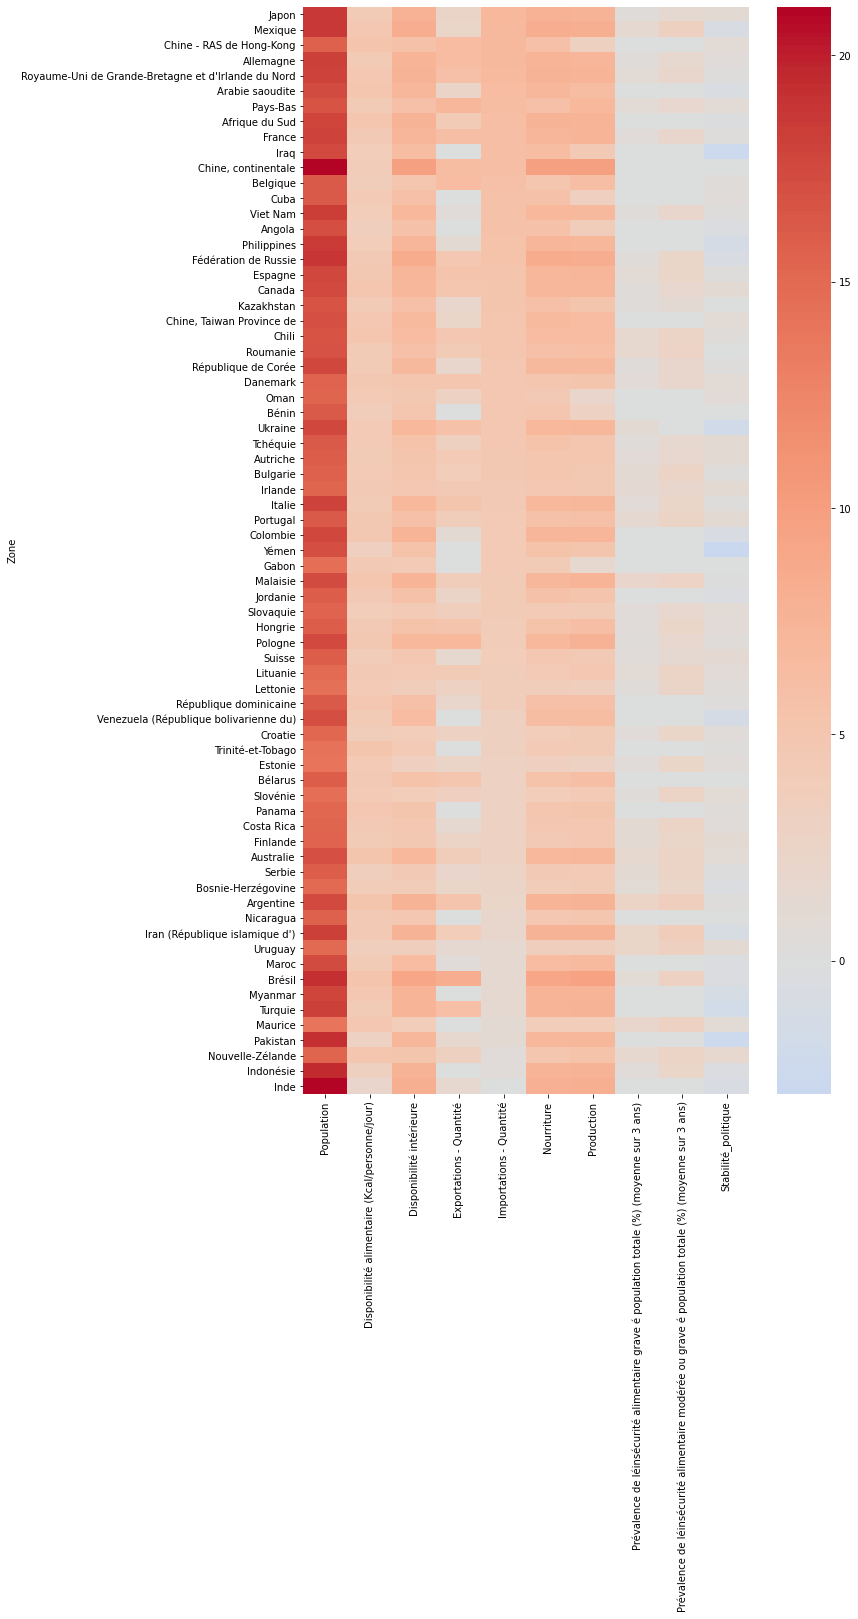

In [309]:
# Observation

plt.figure(figsize=(10,20))
sns.heatmap(cluster_choisie, center=0, cmap='coolwarm')
plt.savefig("heatmap cluster", dpi=300)


In [310]:
# pays du cluster concerné \ liste des pays à ciblé

cluster_choisie.index

Index(['Japon', 'Mexique', 'Chine - RAS de Hong-Kong', 'Allemagne',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'Arabie saoudite', 'Pays-Bas', 'Afrique du Sud', 'France', 'Iraq',
       'Chine, continentale', 'Belgique', 'Cuba', 'Viet Nam', 'Angola',
       'Philippines', 'Fédération de Russie', 'Espagne', 'Canada',
       'Kazakhstan', 'Chine, Taiwan Province de', 'Chili', 'Roumanie',
       'République de Corée', 'Danemark', 'Oman', 'Bénin', 'Ukraine',
       'Tchéquie', 'Autriche', 'Bulgarie', 'Irlande', 'Italie', 'Portugal',
       'Colombie', 'Yémen', 'Gabon', 'Malaisie', 'Jordanie', 'Slovaquie',
       'Hongrie', 'Pologne', 'Suisse', 'Lituanie', 'Lettonie',
       'République dominicaine', 'Venezuela (République bolivarienne du)',
       'Croatie', 'Trinité-et-Tobago', 'Estonie', 'Bélarus', 'Slovénie',
       'Panama', 'Costa Rica', 'Finlande', 'Australie', 'Serbie',
       'Bosnie-Herzégovine', 'Argentine', 'Nicaragua',
       'Iran (République islamique

In [311]:
# Top 10 des pays à retenir 

cluster_choisie.index.tolist()


['Japon',
 'Mexique',
 'Chine - RAS de Hong-Kong',
 'Allemagne',
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
 'Arabie saoudite',
 'Pays-Bas',
 'Afrique du Sud',
 'France',
 'Iraq',
 'Chine, continentale',
 'Belgique',
 'Cuba',
 'Viet Nam',
 'Angola',
 'Philippines',
 'Fédération de Russie',
 'Espagne',
 'Canada',
 'Kazakhstan',
 'Chine, Taiwan Province de',
 'Chili',
 'Roumanie',
 'République de Corée',
 'Danemark',
 'Oman',
 'Bénin',
 'Ukraine',
 'Tchéquie',
 'Autriche',
 'Bulgarie',
 'Irlande',
 'Italie',
 'Portugal',
 'Colombie',
 'Yémen',
 'Gabon',
 'Malaisie',
 'Jordanie',
 'Slovaquie',
 'Hongrie',
 'Pologne',
 'Suisse',
 'Lituanie',
 'Lettonie',
 'République dominicaine',
 'Venezuela (République bolivarienne du)',
 'Croatie',
 'Trinité-et-Tobago',
 'Estonie',
 'Bélarus',
 'Slovénie',
 'Panama',
 'Costa Rica',
 'Finlande',
 'Australie',
 'Serbie',
 'Bosnie-Herzégovine',
 'Argentine',
 'Nicaragua',
 "Iran (République islamique d')",
 'Uruguay',
 'Maroc',
 'Brésil',
 'My

# Carte du monde \ Pays à cibler

### Utilisation de Pygal 

In [323]:
pip install pygal

Note: you may need to restart the kernel to use updated packages.


In [325]:
import pygal


In [314]:
# code pygal des pays \ nommenclature

header=0
pygal=pd.read_excel(r"C:\Users\Rénato CATALFAMO\Desktop\code_pygal.xlsx", header=header)
pygal



,Codes,Des pays
0,un d,Andorre
1,ae,Emirats Arabes Unis
2,un F,Afghanistan
3,Al,Albanie
4,un m,Arménie
...,...,...
179,vous,Yémen
180,yt,Mayotte
181,za,Afrique du Sud
182,zm,Zambie


In [315]:
# jointure entre le fichier pygal et les pays obtenue dans notre cluster choisie --> reucpération des codes 


pays_carte_cluster=pd.merge(pygal,cluster_choisie, left_on="Des pays", right_on="Zone" )
pays_carte_cluster.head()

,Codes,Des pays,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Prévalence de léinsécurité alimentaire grave é population totale (%) (moyenne sur 3 ans),Prévalence de léinsécurité alimentaire modérée ou grave é population totale (%) (moyenne sur 3 ans),Stabilité_politique
0,ao,Angola,17.210581,3.583519,5.768321,0.000000,5.627621,5.755742,3.761200,0.000000,0.000000,-0.33
1,ar,Argentine,17.598271,5.209486,7.582229,5.337538,2.197225,7.526718,7.678789,2.501436,3.505557,0.17
2,au,Australie,17.017632,5.262690,7.066467,3.761200,2.833213,7.066467,7.146772,1.526056,2.617396,0.89
3,être,Belgique,16.250855,3.806662,5.030438,6.487684,5.826000,4.976734,6.139885,0.000000,0.000000,0.43
4,bg,Bulgarie,15.775950,4.406719,5.062595,3.828641,4.691348,5.062595,4.682131,1.131402,2.564949,0.33


In [316]:
# codes des pays concerné 

code_pays=pays_carte_cluster['Codes'].tolist()
code_pays

['ao',
 'ar',
 'au',
 'être',
 'bg',
 'bj',
 'br',
 'Californie',
 'cl',
 'co',
 'cr',
 'cu',
 'de',
 'dk',
 'fais',
 'ee',
 'es',
 'Fi',
 'fr',
 'Géorgie',
 'heure',
 'hu',
 'identifiant',
 'c’est à dire',
 'dans',
 'il',
 'jp',
 'kz',
 'lt',
 'lv',
 'ma',
 'mm',
 'mx',
 'ma',
 'ni',
 'nl',
 'nz',
 'om',
 'Pennsylvanie',
 'ph',
 'paquet',
 'PL',
 'ro',
 'rs',
 'si',
 'sk',
 'ua',
 'uy',
 'vn',
 'vous',
 'za']

In [327]:
# affichage des pays concerné sur la carte

# pays sur la carte du monde \ voir nommenclature des pays 


worldmap =  pygal.maps.world.World()

  
worldmap.title = 'Carte du monde'

  
worldmap.add('Pays concerné choisie pour l_exportation du poulet \ La poule qui chante', code_pays) 



AttributeError: module 'pygal' has no attribute 'maps'